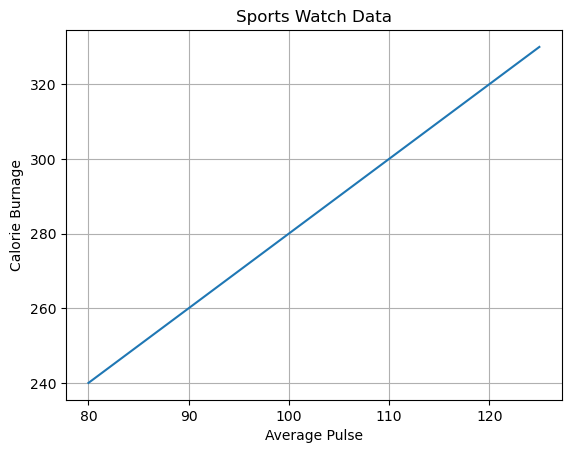

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

plt.title("Sports Watch Data")
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")

plt.plot(x, y)

plt.grid()

plt.show()

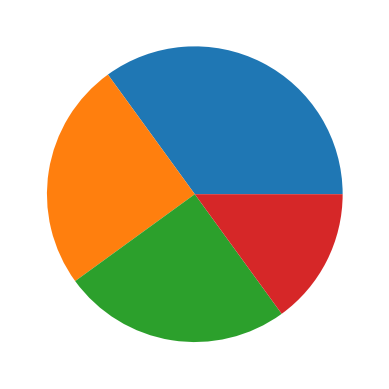

In [1]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])

plt.pie(y)
plt.show()

In [5]:
from scipy import constants

print(constants.liter)

0.001


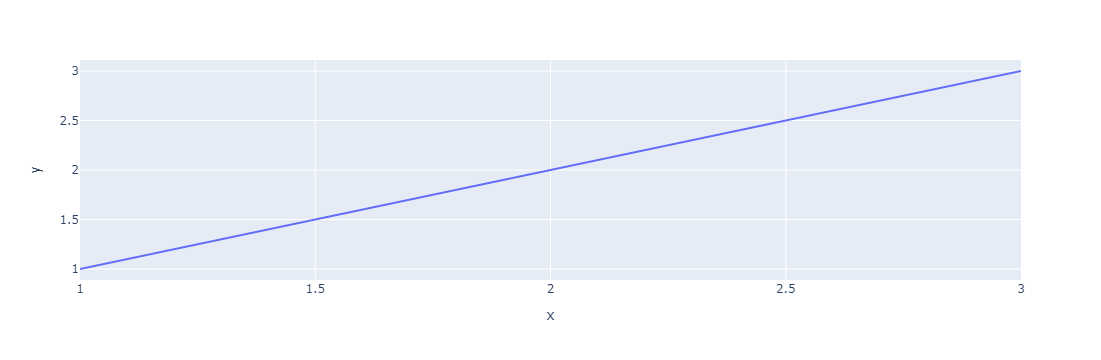

In [8]:
import plotly.express as px


# Creating the Figure instance
fig = px.line(x=[1, 2, 3], y=[1, 2, 3])

# showing the plot
fig.show()

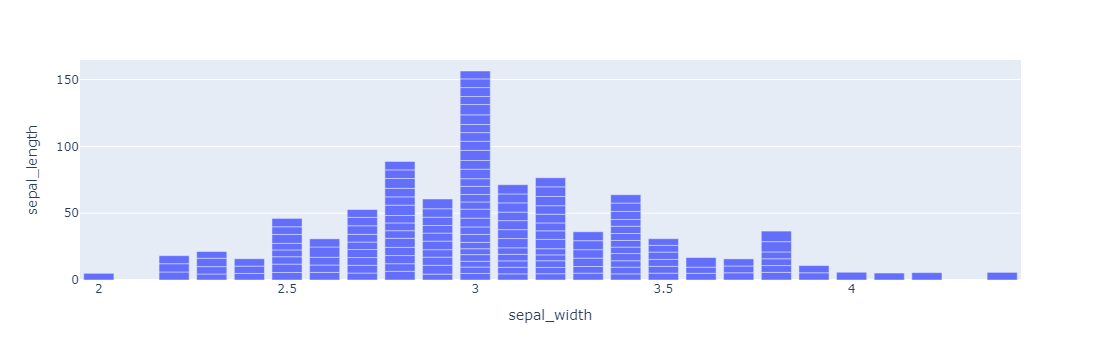

In [12]:
import plotly.express as px
# using the iris dataset
df = px.data.iris()

# plotting the bar chart
fig = px.bar(df, x="sepal_width", y="sepal_length")

# showing the plot
fig.show()

# MACHINE LEARNING

In [ ]:
#Example :
#Here is a simple machine-learning example in Python that demonstrates how to train a model to predict the species of iris flowers based on their sepal and petal measurements:
# Load the necessary libraries 
import pandas as pd 
from sklearn.model_selection import train_test_split #The train_test_split function of the sklearn.model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.
from sklearn.svm import SVC #Python'daki popüler scikit-learn kütüphanesinde, SVC, SVM'nin sınıflandırma problemleri için bir uygulamasıdır. Scikit-learn’de SVC sınıfı, SVM algoritmasını uygulayarak veri noktalarını sınıflandırır. SVC sınıfı, SVM algoritmasını kullanarak iki sınıf arasındaki karar sınırını öğrenir ve bu sınırı kullanarak yeni veri noktalarını sınıflandırır.

  
# Load the iris dataset 
df = pd.read_csv('iris.csv') 
  
# Split the data into features and labels 
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
y = df['species'] 
  
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
  
# Create an SVM model and train it 
model = SVC() 
model.fit(X_train, y_train) 
  
# Evaluate the model on the test data 
accuracy = model.score(X_test, y_test) 
  
print('Test accuracy:', accuracy)


# Cat & Dog Classification using Convolutional Neural Network in Python

In [153]:
!pip install tensorflow

In [155]:
!pip install pydot
!pip install graphviz


In [157]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import pydot
import warnings 
warnings.filterwarnings('ignore') 
from tensorflow.keras.utils import plot_model
from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 

import os 
import matplotlib.image as mpimg


In [159]:
from zipfile import ZipFile 

data_path = 'dog-vs-cat-classification.zip'

with ZipFile(data_path, 'r') as zip: 
	zip.extractall() 
	print('The data set has been extracted.') 


The data set has been extracted.


In [161]:
path = 'dog-vs-cat-classification'
classes = os.listdir(path) 
classes 


['cats', 'dogs']

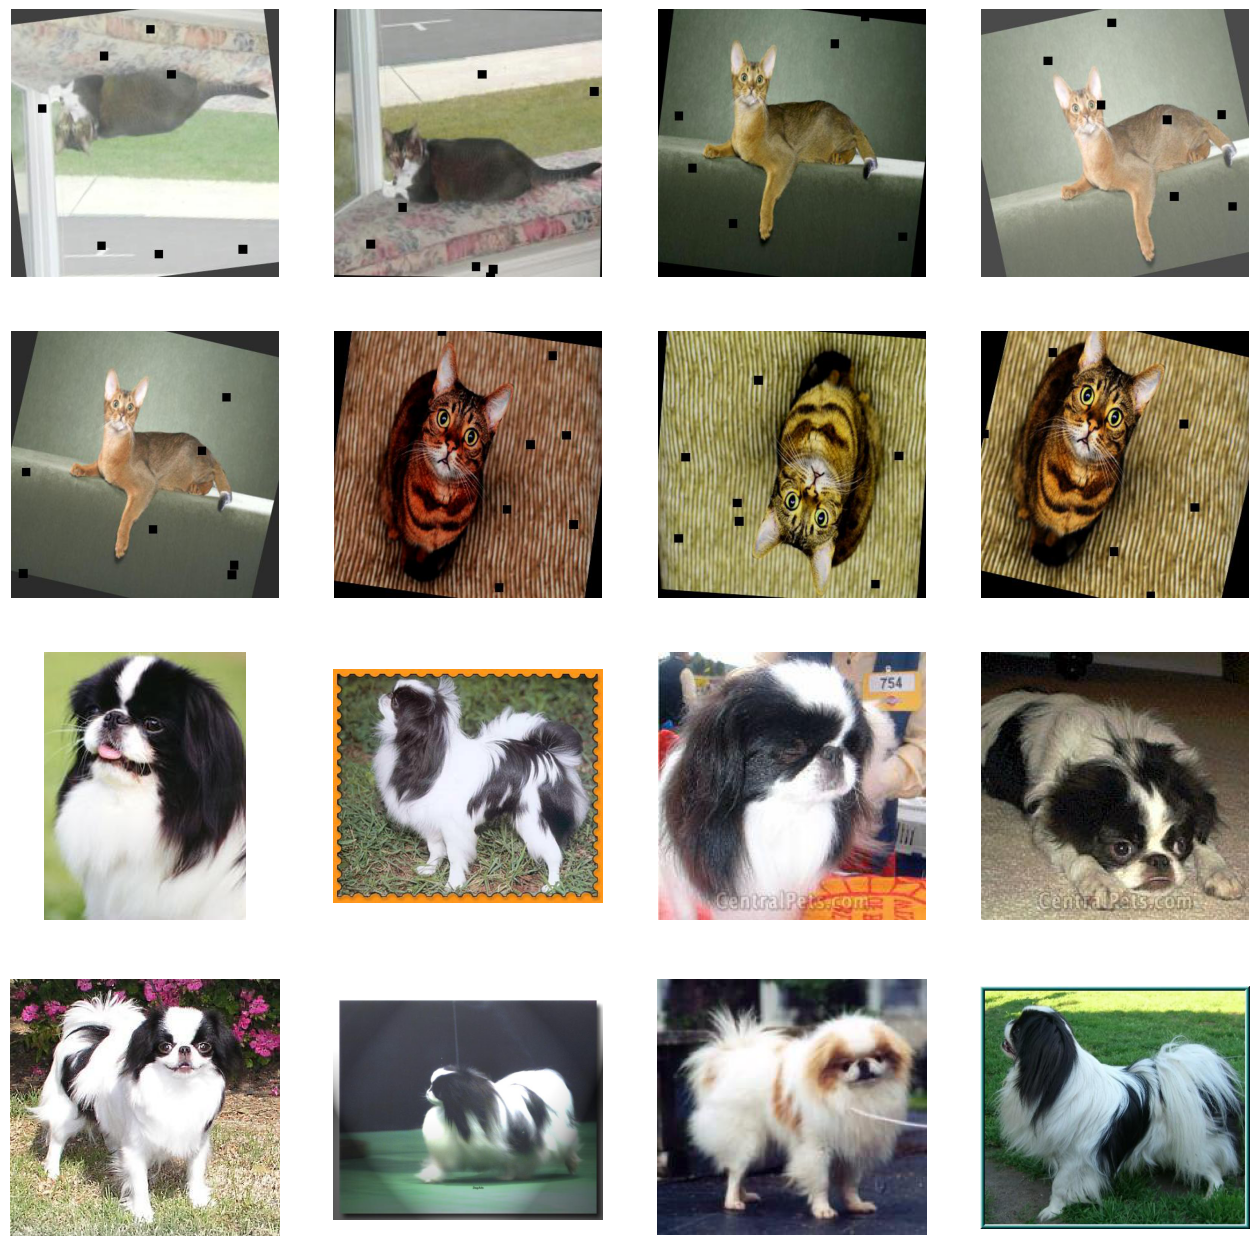

In [163]:
fig = plt.gcf() 
fig.set_size_inches(16, 16) 

cat_dir = os.path.join('dog-vs-cat-classification/cats') 
dog_dir = os.path.join('dog-vs-cat-classification/dogs') 
cat_names = os.listdir(cat_dir) 
dog_names = os.listdir(dog_dir) 

pic_index = 210

cat_images = [os.path.join(cat_dir, fname) 
			for fname in cat_names[pic_index-8:pic_index]] 
dog_images = [os.path.join(dog_dir, fname) 
			for fname in dog_names[pic_index-8:pic_index]] 

for i, img_path in enumerate(cat_images + dog_images): 
	sp = plt.subplot(4, 4, i+1) 
	sp.axis('Off') 

	img = mpimg.imread(img_path) 
	plt.imshow(img) 

plt.show() 


In [165]:
base_dir = 'dog-vs-cat-classification'

# Create datasets 
train_datagen = image_dataset_from_directory(base_dir, 
												image_size=(200,200), 
												subset='training', 
												seed = 1, 
												validation_split=0.1, 
												batch_size= 32) 
test_datagen = image_dataset_from_directory(base_dir, 
												image_size=(200,200), 
												subset='validation', 
												seed = 1, 
												validation_split=0.1, 
												batch_size= 32)


Found 2500 files belonging to 2 classes.
Using 2250 files for training.
Found 2500 files belonging to 2 classes.
Using 250 files for validation.


In [167]:
model = tf.keras.models.Sequential([ 
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 

	layers.Flatten(), 
	layers.Dense(512, activation='relu'), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.1), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.2), 
	layers.BatchNormalization(), 
	layers.Dense(1, activation='sigmoid') 
]) 


In [169]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [171]:
keras.utils.plot_model( 
	model, 
	show_shapes=True, 
	show_dtype=True, 
	show_layer_activations=True
) 

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [173]:
model.compile( 
	loss='binary_crossentropy', 
	optimizer='adam', 
	metrics=['accuracy'] 
) 


In [175]:
history = model.fit(train_datagen, 
		epochs=10, 
		validation_data=test_datagen) 


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 31s 347ms/step - accuracy: 0.6288 - loss: 0.7981 - val_accuracy: 0.4720 - val_loss: 3.3688
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 341ms/step - accuracy: 0.6706 - loss: 0.6327 - val_accuracy: 0.6360 - val_loss: 0.6525
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 340ms/step - accuracy: 0.7261 - loss: 0.5489 - val_accuracy: 0.5520 - val_loss: 0.8407
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 344ms/step - accuracy: 0.8228 - loss: 0.3995 - val_accuracy: 0.7640 - val_loss: 0.5293
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 26s 367ms/step - accuracy: 0.8716 - loss: 0.3097 - val_accuracy: 0.9000 - val_loss: 0.2800
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 25s 354ms/step - accuracy: 0.8982 - loss: 0.2508 - val_accuracy: 0.9200 - val_loss: 0.1872
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 341ms/step - accuracy: 0.9387 - loss: 0.1670 - val_accuracy: 0.9280 - val_loss: 0.1591
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 340ms/step - accuracy: 0.9539 - loss: 0.1330 - val_accu

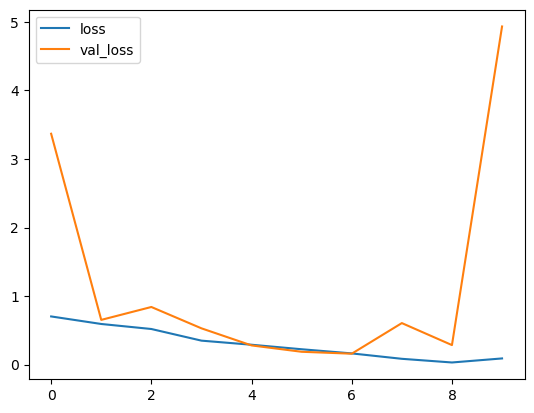

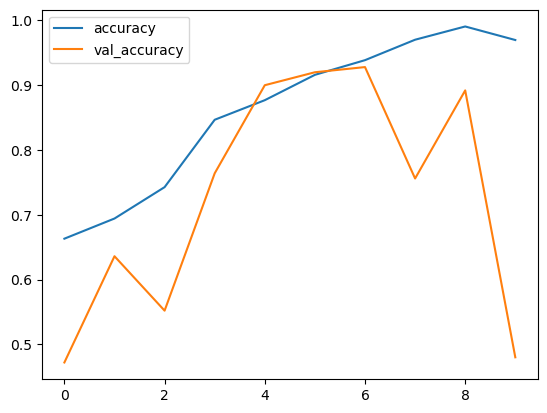

In [177]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Cat


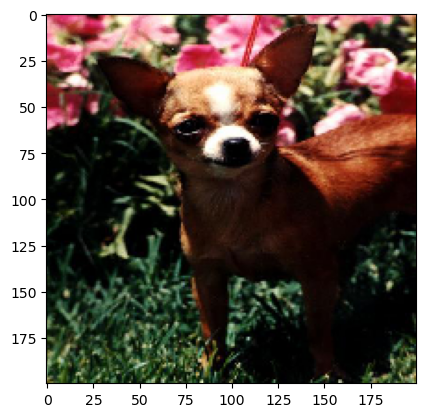

In [191]:
from keras.preprocessing import image 

#Input image 
test_image = image.load_img('dog-vs-cat-classification/dogs/n02085620_10131.jpg',target_size=(200,200)) 

#For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image,axis=0) 

# Result array 
result = model.predict(test_image) 

#Mapping result array with the main name list 
i=0
if(result>=0.5): 
    print("Dog") 
else: 
    print("Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Cat


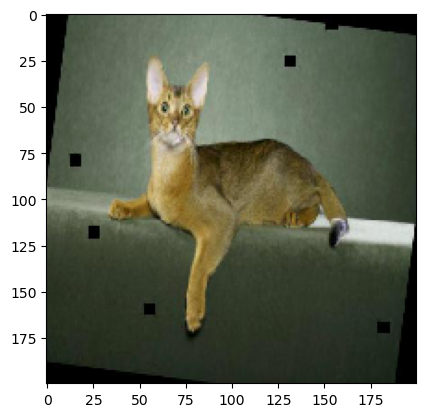

In [193]:
test_image = image.load_img('dog-vs-cat-classification/cats/Abyssinian_1_jpg.rf.84a6c4185c55c3f4c437d5d2c4859fd1.jpg', target_size=(200, 200)) 

# For show image 
plt.imshow(test_image) 
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image, axis=0) 

# Result array 
result = model.predict(test_image) 
# Mapping result array with the main name list 
i = 0
if(result >= 0.5): 
	print("Dog") 
else: 
	print("Cat") 
